#Importing Libraries

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import bokeh

# For Analysis and Forecasting
from scipy import stats

# Others
import datetime
import os
import pickle
import requests

#Importing Data

In [ ]:
df = pd.read_csv(r"/content/PoductDemand.csv")

In [ ]:
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [ ]:
df.tail()

,ID,Store ID,Total Price,Base Price,Units Sold
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12
150149,212644,9984,234.4125,234.4125,15


#DATA CLEANING AND PREPROCESSING

In [ ]:
df.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,206.626751,219.425927,51.674206
std,61386.037861,615.591445,103.308516,110.961712,60.207904
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [ ]:
print("Number of attributes with null vaules: ", df.isnull().any().sum())
print("Percentage of missing values: ",df.isnull().any(axis=1).sum()/len(df)*100)

Number of attributes with null vaules:  1
Percentage of missing values:  0.000666000666000666


In [ ]:
df.dropna(axis=0, how="any", inplace=True)

In [ ]:
df = df.sort_values(by=['ID', 'Store ID'])
df = df.set_index('ID')
df.head()

,Store ID,Total Price,Base Price,Units Sold
ID,,,,
1,8091,99.0375,111.8625,20
2,8091,99.0375,99.0375,28
3,8091,133.9500,133.9500,19
4,8091,133.9500,133.9500,44
5,8091,141.0750,141.0750,52


In [ ]:
category_yearly_demand = df.groupby([df.index.year, 'Product_Category'])['Order_Demand'].mean()

Text(0.5, 1.02, 'Yearly Average Demand for all the Product Categories')

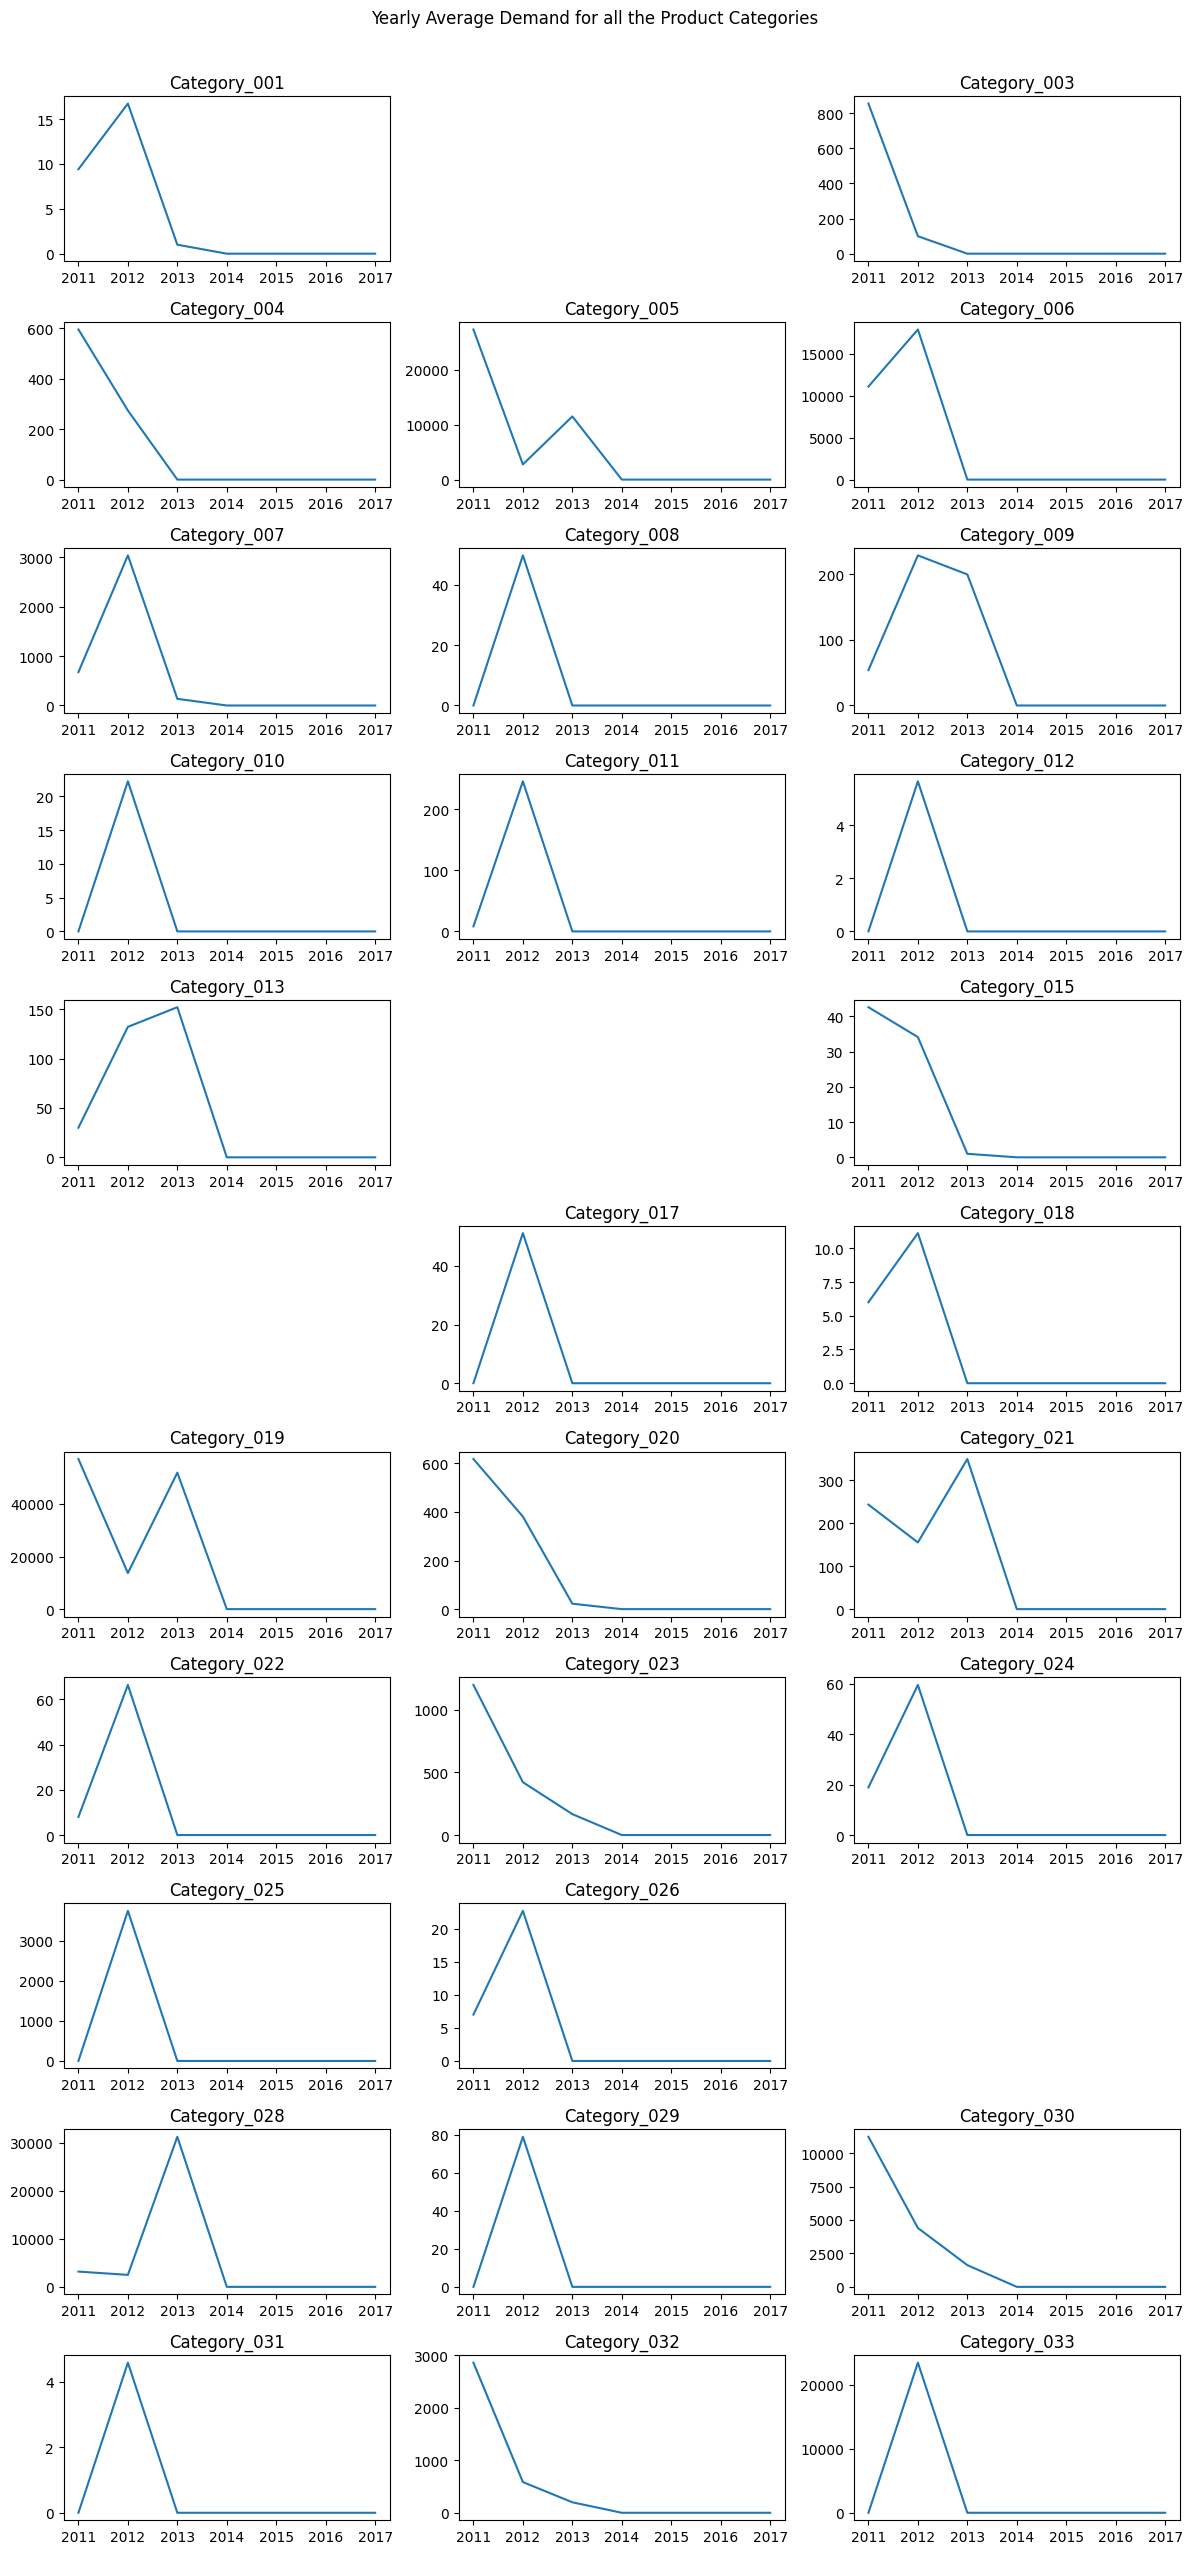

In [ ]:
padded_category_data = {}
for category, category_data in category_yearly_demand.groupby(level = 'Product_Category'):
#     print(f"Category: {category}")
    padded_category_data[category] = [0 for _ in range(7)]
    for year, total_demand in category_data.items():
        index = ((year[0] - 2010) % 7) - 1
        padded_category_data[category][index] = total_demand

fig = plt.figure(figsize=(12, 25))
rows, cols = 11, 3
x = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

for title, data in padded_category_data.items():
    # Create subplots in the grid
    ax = fig.add_subplot(rows, cols, int(title[-2:]))
    # Plotting data on the current subplot
    ax.plot(x, data)
    ax.set_title(title)

plt.tight_layout()
fig.suptitle("Yearly Average Demand for all the Product Categories", y=1.02)

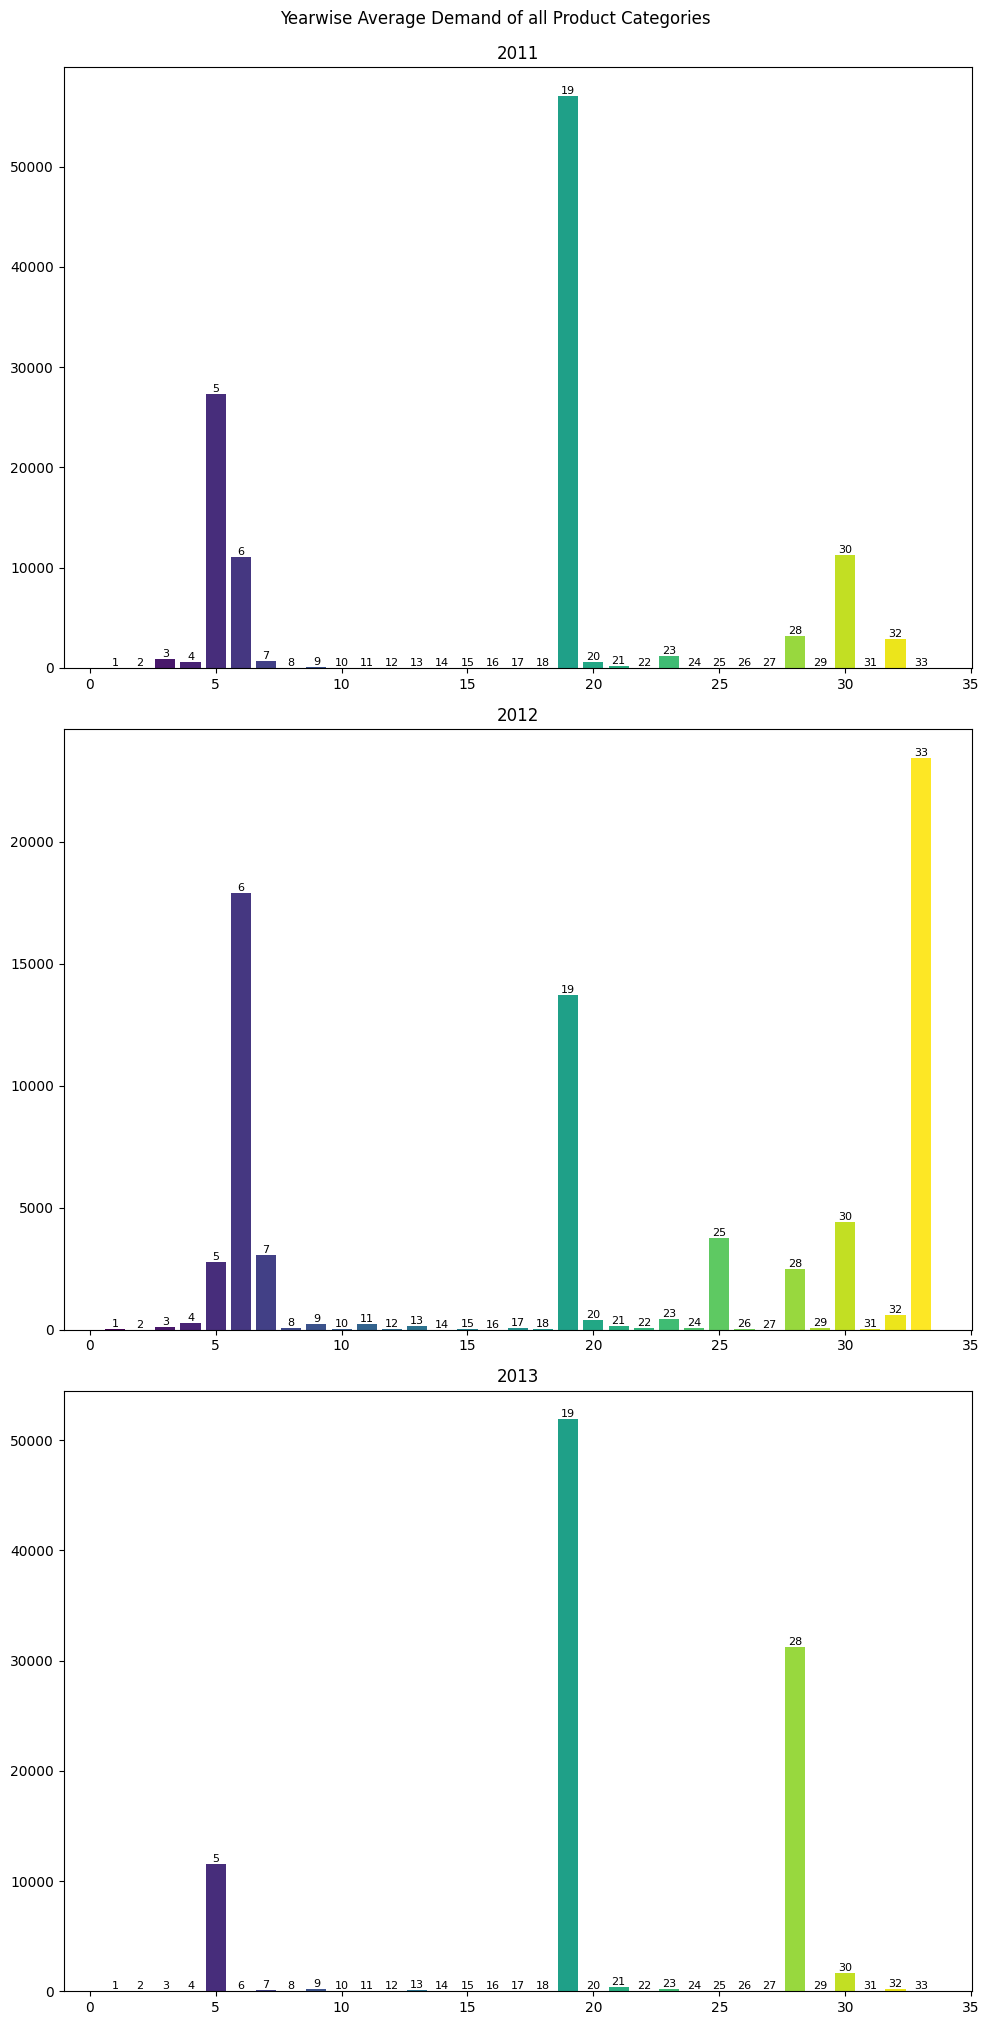

In [ ]:
padded_yearly_categories = {}
for year, year_data in category_yearly_demand.groupby(level = 'Date'):
#     print(f"Category: {category}")
    padded_yearly_categories[year] = [0 for _ in range(33)]
    for category, total_demand in year_data.items():
#         print(category)
        index = (int(category[1][-2:]) % 33) - 1
        padded_yearly_categories[year][index] = total_demand

x = [i+1 for i in range(33)]
rows = len(padded_yearly_categories)
cols = 1

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 20))

colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

for i, (year, data) in enumerate(padded_yearly_categories.items()):
    # Calculate the row and column indices for the subplot

    # Create a bar plot in the current subplot
    bars = axes[i].bar(x, data, color=colors)
    axes[i].bar_label(bars, labels=x, fontsize = 8)

    # Set the category title as the subplot title
    axes[i].set_title(year)

    # Hide only the y-axis scales (ticks)
#     axes[row_idx, col_idx].get_yaxis().set_visible(False)

plt.tight_layout()
fig.suptitle("Yearwise Average Demand of all Product Categories", y=1.01)
plt.show()

In [ ]:
warehouse_yearly_demand = df.groupby([df.index.year, 'Warehouse'])['Order_Demand'].mean()

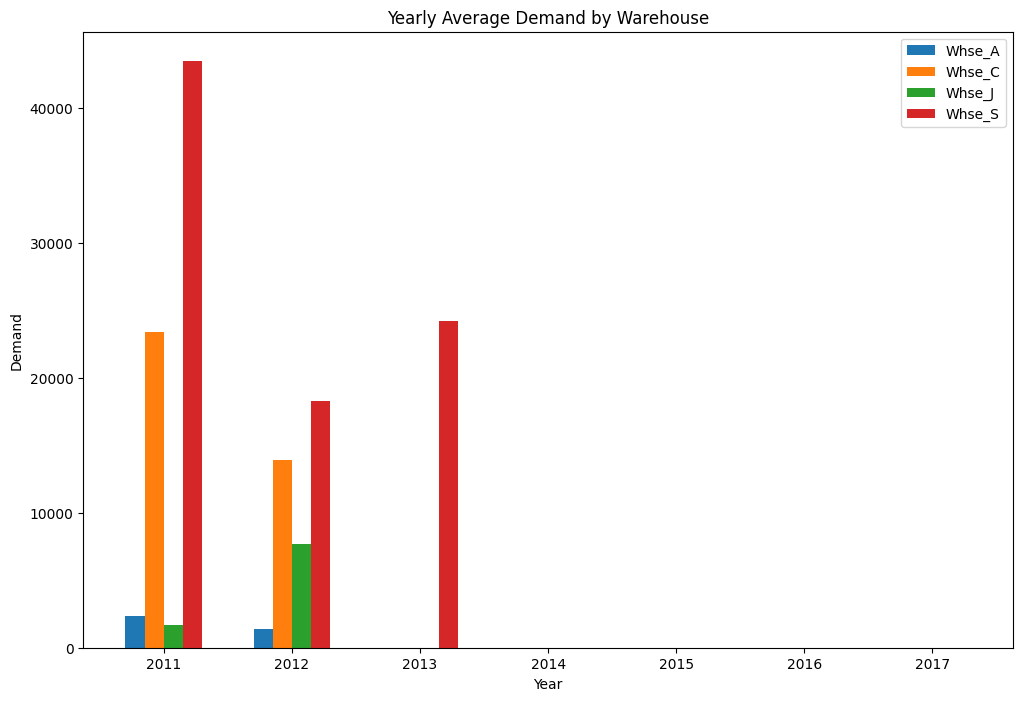

In [ ]:
demand_data = {}
warehouses = []
years = [2011 + i for i in range(7)]
for warehouse, warehouse_data in warehouse_yearly_demand.groupby(level='Warehouse'):
    warehouses.append(warehouse)
    demand_data[warehouse] = [0 for i in range(7)]
    for year, year_data in warehouse_data.items():
        index = ((year[0] - 2010) % 7) - 1
        demand_data[warehouse][index] = year_data
# print(demand_data)

# Determine the number of warehouses and the number of years
num_warehouses = len(warehouses)
num_years = len(years)

# Set the width of the bars
bar_width = 0.15

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define the index for the x-axis
x = np.arange(num_years)

# Create a grouped bar chart
for i, warehouse in enumerate(warehouses):
    # Offset the x-position for each warehouse
    x_pos = x + i * bar_width

    # Plot the demand values for the current warehouse
    ax.bar(x_pos, demand_data[warehouse], width=bar_width, label=warehouse)

# Set x-axis labels and tick positions
ax.set_xticks(x + (num_warehouses - 1) * bar_width / 2)
ax.set_xticklabels(years)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Demand')
ax.set_title('Yearly Average Demand by Warehouse')

# Add a legend to distinguish the warehouses
ax.legend()

# Show the chart
plt.show()
